In [25]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

In [26]:
data_sliced = pd.read_csv('./data/dataset_sliced.csv')



In [27]:
X_sliced = data_sliced.iloc[:, 0:17]
y_sliced = data_sliced.iloc[:, 18]


In [28]:
X_sliced_train, X_sliced_val, y_sliced_train,  y_sliced_val = train_test_split(X_sliced, y_sliced, test_size=0.4, random_state=42)
print(X_sliced_train.shape, y_sliced_train.shape, X_sliced_val.shape, y_sliced_val.shape)

(38818, 17) (38818,) (25879, 17) (25879,)


In [29]:
forest_sliced = RandomForestRegressor(criterion='mae', max_depth=15, n_estimators=1000,n_jobs=-1)
forest_sliced.fit(X_sliced_train, y_sliced_train)
y_sliced_test_pred = forest_sliced.predict(X_sliced_val)
mean_absolute_error(y_sliced_val,y_sliced_test_pred)

5.768791432657874

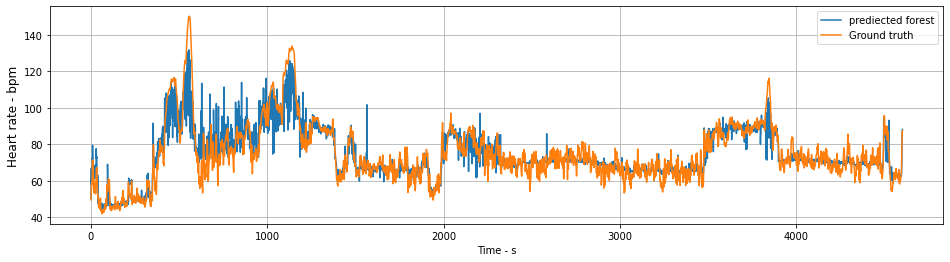

In [35]:
S1_sliced = data_sliced.loc[data_sliced['Subject'] == 'S1']
S1_sliced_X = S1_sliced.iloc[:, 0:17]
S1_sliced_y = S1_sliced.iloc[:, 18]
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot( forest_sliced.predict(S1_sliced_X), label = 'prediected forest')
plt.plot( S1_sliced_y, label = 'Ground truth')
plt.legend()
plt.ylabel('Heart rate - bpm', fontsize=12)
plt.xlabel('Time - s')
plt.show()

In [31]:
S1_pred_forest_sliced = forest_sliced.predict(S1_sliced_X)
mean_absolute_error(S1_pred_forest_sliced, S1_sliced_y)

4.403100278063903

#Save model as pkl file

In [40]:
import pickle

with open("./.ipynb_checkpoints/RF_sliced.pkl", "wb") as f:
   pickle.dump(forest_sliced, f)

In [ ]:
#Load saved model
with open("RF_sliced.pkl", "rb") as f:
   forest_sliced = pickle.load(f)

In [32]:
S1 = data_sliced.loc[data_sliced['Subject'] == 'S1']
S2 = data_sliced.loc[data_sliced['Subject'] == 'S2']
S3 = data_sliced.loc[data_sliced['Subject'] == 'S3']
S4 = data_sliced.loc[data_sliced['Subject'] == 'S4']
S5 = data_sliced.loc[data_sliced['Subject'] == 'S5']
S6 = data_sliced.loc[data_sliced['Subject'] == 'S6']
S7 = data_sliced.loc[data_sliced['Subject'] == 'S7']
S8 = data_sliced.loc[data_sliced['Subject'] == 'S8']
S9 = data_sliced.loc[data_sliced['Subject'] == 'S9']
S10 = data_sliced.loc[data_sliced['Subject'] == 'S10']
S11 = data_sliced.loc[data_sliced['Subject'] == 'S11']
S12 = data_sliced.loc[data_sliced['Subject'] == 'S12']
S13 = data_sliced.loc[data_sliced['Subject'] == 'S13']
S14 = data_sliced.loc[data_sliced['Subject'] == 'S14']
S15 = data_sliced.loc[data_sliced['Subject'] == 'S15']


c:\Users\Conler\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
c:\Users\Conler\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
S1 = data_sliced.loc[data_sliced['Subject'] == 'S1']
S1_X = S1.iloc[:, 0:17]
S1_y = S1.iloc[:, 18]
S2 = data_sliced.loc[data_sliced['Subject'] == 'S2']
S2_X = S2.iloc[:, 0:17]
S2_y = S2.iloc[:, 18]
S3 = data_sliced.loc[data_sliced['Subject'] == 'S3']
S3_X = S3.iloc[:, 0:17]
S3_y = S3.iloc[:, 18]
S4 = data_sliced.loc[data_sliced['Subject'] == 'S4']
S4_X = S4.iloc[:, 0:17]
S4_y = S4.iloc[:, 18]
S5 = data_sliced.loc[data_sliced['Subject'] == 'S5']
S5_X = S5.iloc[:, 0:17]
S5_y = S5.iloc[:, 18]
S6 = data_sliced.loc[data_sliced['Subject'] == 'S6']
S6_X = S6.iloc[:, 0:17]
S6_y = S6.iloc[:, 18]
S7 = data_sliced.loc[data_sliced['Subject'] == 'S7']
S7_X = S7.iloc[:, 0:17]
S7_y = S7.iloc[:, 18]
S8 = data_sliced.loc[data_sliced['Subject'] == 'S8']
S8_X = S8.iloc[:, 0:17]
S8_y = S8.iloc[:, 18]
S9 = data_sliced.loc[data_sliced['Subject'] == 'S9']
S9_X = S9.iloc[:, 0:17]
S9_y = S9.iloc[:, 18]
S10 = data_sliced.loc[data_sliced['Subject'] == 'S10']
S10_X = S10.iloc[:, 0:17]
S10_y = S10.iloc[:, 18]
S11 = data_sliced.loc[data_sliced['Subject'] == 'S11']
S11_X = S11.iloc[:, 0:17]
S11_y = S11.iloc[:, 18]
S12 = data_sliced.loc[data_sliced['Subject'] == 'S12']
S12_X = S12.iloc[:, 0:17]
S12_y = S12.iloc[:, 18]
S13 = data_sliced.loc[data_sliced['Subject'] == 'S13']
S13_X = S13.iloc[:, 0:17]
S13_y = S13.iloc[:, 18]
S14 = data_sliced.loc[data_sliced['Subject'] == 'S14']
S14_X = S14.iloc[:, 0:17]
S14_y = S14.iloc[:, 18]
S15 = data_sliced.loc[data_sliced['Subject'] == 'S15']
S15_X = S15.iloc[:, 0:17]
S15_y = S15.iloc[:, 18]




In [37]:
S1_pred_forest_sliced = forest_sliced.predict(S1_X)
print('S1 MAE = '+str(mean_absolute_error(S1_pred_forest_sliced, S1_y)))
S2_pred_forest_sliced = forest_sliced.predict(S2_X)
print('S2 MAE = '+str(mean_absolute_error(S2_pred_forest_sliced, S2_y))) 
S3_pred_forest_sliced = forest_sliced.predict(S3_X)
print('S3 MAE = '+str(mean_absolute_error(S3_pred_forest_sliced, S3_y))) 
S4_pred_forest_sliced = forest_sliced.predict(S4_X)
print('S4 MAE = '+str(mean_absolute_error(S4_pred_forest_sliced, S4_y))) 
S5_pred_forest_sliced = forest_sliced.predict(S5_X)
print('S5 MAE = '+str(mean_absolute_error(S5_pred_forest_sliced, S5_y)))
S6_pred_forest_sliced = forest_sliced.predict(S6_X)
print('S6 MAE = '+str(mean_absolute_error(S6_pred_forest_sliced, S6_y)))
S7_pred_forest_sliced = forest_sliced.predict(S7_X)
print('S7 MAE = '+str(mean_absolute_error(S7_pred_forest_sliced, S7_y)))
S8_pred_forest_sliced = forest_sliced.predict(S8_X)
print('S8 MAE = '+str(mean_absolute_error(S8_pred_forest_sliced, S8_y)))
S9_pred_forest_sliced = forest_sliced.predict(S9_X)
print('S9 MAE = '+str(mean_absolute_error(S9_pred_forest_sliced, S9_y)))
S10_pred_forest_sliced = forest_sliced.predict(S10_X)
print('S10 MAE = '+str(mean_absolute_error(S10_pred_forest_sliced, S10_y)))
S11_pred_forest_sliced = forest_sliced.predict(S11_X)
print('S11 MAE = '+str(mean_absolute_error(S11_pred_forest_sliced, S11_y)))
S12_pred_forest_sliced = forest_sliced.predict(S12_X)
print('S12 MAE = '+str(mean_absolute_error(S12_pred_forest_sliced, S12_y)))
S13_pred_forest_sliced = forest_sliced.predict(S13_X)
print('S13 MAE = '+str(mean_absolute_error(S13_pred_forest_sliced, S13_y)))
S14_pred_forest_sliced = forest_sliced.predict(S14_X)
print('S14 MAE = '+str(mean_absolute_error(S14_pred_forest_sliced, S14_y)))
S15_pred_forest_sliced = forest_sliced.predict(S15_X)
print('S15 MAE = '+str(mean_absolute_error(S15_pred_forest_sliced, S15_y)))

S1 MAE = 4.403100278063903
S2 MAE = 3.571324812380155
S3 MAE = 3.9953918939729607
S4 MAE = 4.240694954617764
S5 MAE = 4.404969710379833
S6 MAE = 4.485059084576498
S7 MAE = 5.1817126221694485
S8 MAE = 4.124868232096045
S9 MAE = 5.549460069116851
S10 MAE = 4.79459211564204
S11 MAE = 6.525772676422371
S12 MAE = 2.992114098319983
S13 MAE = 5.802492780443742
S14 MAE = 5.943366471123873
S15 MAE = 3.845129821226757
